# setup

In [1]:
import os

if os.getcwd().split('/')[-1] == 'notebooks':
    os.chdir('..')

In [244]:
import pathlib
import matplotlib.pyplot as plt
import lasio
import numpy as np
import tensorflow as tf

2024-08-27 04:50:56.017706: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [76]:
from segysak.segy import get_segy_texthead, segy_header_scan, segy_header_scrape, segy_loader
from sklearn.linear_model import LinearRegression

# sismica

In [5]:
V3D_path = pathlib.Path("data/dados/buzios_corte_tempo.sgy")
print("3D", V3D_path, V3D_path.exists())

3D data/dados/buzios_corte_tempo.sgy True


In [6]:
get_segy_texthead(V3D_path)

Text HeaderC 1 3D VOLUME
C 2 HEADER BYTE LOCATIONS AND TYPES:
C 3     3D INLINE : 189-192 (4-BYTE INT)    3D CROSSLINE: 193-196 (4-BYTE INT)
C 4     ENSEMBLE X: 181-184 (4-BYTE INT)    ENSEMBLE Y  : 185-188 (4-BYTE INT)
C 5
C 6 SAMPLES/TRACE     :         24
C 7 SAMPLE INTERVAL   :       4000 microseconds
C 8 FIRST SAMPLE AT   :       4948 ms
C 9 VERTICAL DIMENSION: TWT (ms)
C10 SAMPLE RECORDING FORMAT: IBM FLOATING POINT (4-BYTE)
C11 X/Y Min/Max       : X:741280.14-767058.81 Y:7249472.95-7277339.93
C12
C13
C14
C15
C16
C17
C18
C19
C20
C21
C22
C23
C24
C25
C26
C27
C28
C29
C30
C31
C32
C33
C34
C35
C36
C37
C38 WRITTEN BY DUG INSIGHT VERSION 5.1 (403262)             http://www.dug.com/
C39 SEG Y REV1
C40 END TEXTUAL HEADER

In [8]:
scan = segy_header_scan(V3D_path)
scan

100%|██████████| 1.00k/1.00k [00:00<00:00, 17.7k traces/s]


,byte_loc,count,mean,std,min,25%,50%,75%,max
TRACE_SEQUENCE_LINE,1,1000.0,500.500,288.819436,1.0,250.75,500.5,750.25,1000.0
TRACE_SEQUENCE_FILE,5,1000.0,500.500,288.819436,1.0,250.75,500.5,750.25,1000.0
FieldRecord,9,1000.0,4004.713,0.699371,4004.0,4004.00,4005.0,4005.00,4006.0
TraceNumber,13,1000.0,0.000,0.000000,0.0,0.00,0.0,0.00,0.0
EnergySourcePoint,17,1000.0,0.000,0.000000,0.0,0.00,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...
SourceEnergyDirectionMantissa,219,1000.0,0.000,0.000000,0.0,0.00,0.0,0.00,0.0
SourceEnergyDirectionExponent,223,1000.0,0.000,0.000000,0.0,0.00,0.0,0.00,0.0
SourceMeasurementMantissa,225,1000.0,0.000,0.000000,0.0,0.00,0.0,0.00,0.0
SourceMeasurementExponent,229,1000.0,0.000,0.000000,0.0,0.00,0.0,0.00,0.0


In [9]:
scan[scan["std"] > 0]

,byte_loc,count,mean,std,min,25%,50%,75%,max
TRACE_SEQUENCE_LINE,1,1000.0,5.005000e+02,288.819436,1.0,250.75,500.5,750.25,1000.0
TRACE_SEQUENCE_FILE,5,1000.0,5.005000e+02,288.819436,1.0,250.75,500.5,750.25,1000.0
FieldRecord,9,1000.0,4.004713e+03,0.699371,4004.0,4004.00,4005.0,4005.00,4006.0
CDP,21,1000.0,2.344627e+03,127.055519,2150.0,2233.00,2330.5,2455.25,2580.0
SourceX,73,1000.0,7.533640e+06,5933.330036,7522576.0,7528456.75,7534290.5,7538875.25,7542950.0
SourceY,77,1000.0,7.253592e+07,14733.694317,72513252.0,72522976.25,72534257.0,72548765.00,72563273.0
CDP_X,181,1000.0,7.533653e+06,5933.638623,7522588.0,7528469.75,7534303.5,7538888.25,7542964.0
CDP_Y,185,1000.0,7.253593e+07,14733.458065,72513264.0,72522988.00,72534268.5,72548776.75,72563285.0
INLINE_3D,189,1000.0,4.004713e+03,0.699371,4004.0,4004.00,4005.0,4005.00,4006.0
CROSSLINE_3D,193,1000.0,2.344627e+03,127.055519,2150.0,2233.00,2330.5,2455.25,2580.0


In [11]:
scrape = segy_header_scrape(V3D_path, partial_scan=1000)
scrape

100%|██████████| 1.00k/1.00k [00:00<00:00, 14.9k traces/s]


,TRACE_SEQUENCE_LINE,TRACE_SEQUENCE_FILE,FieldRecord,TraceNumber,EnergySourcePoint,CDP,CDP_TRACE,TraceIdentificationCode,NSummedTraces,NStackedTraces,...,TransductionConstantPower,TransductionUnit,TraceIdentifier,ScalarTraceHeader,SourceType,SourceEnergyDirectionMantissa,SourceEnergyDirectionExponent,SourceMeasurementMantissa,SourceMeasurementExponent,SourceMeasurementUnit
0,1,1,4004,0,0,2150,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2,4004,0,0,2151,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,3,4004,0,0,2152,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,4,4004,0,0,2153,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,5,4004,0,0,2154,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,996,4006,0,0,2287,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
996,997,997,4006,0,0,2288,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
997,998,998,4006,0,0,2289,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
998,999,999,4006,0,0,2290,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
V3D = segy_loader(V3D_path, iline=189, xline=193, cdpx=73, cdpy=77, vert_domain="TWT")
V3D

100%|██████████| 73.3k/73.3k [00:03<00:00, 23.1k traces/s]


Loading as 3D
Fast direction is INLINE_3D


Converting SEGY: 100%|██████████| 73.3k/73.3k [00:11<00:00, 6.48k traces/s]


<xarray.Dataset>
Dimensions:  (iline: 172, xline: 429, twt: 24)
Coordinates:
  * iline    (iline) uint16 4004 4005 4006 4007 4008 ... 4172 4173 4174 4175
  * xline    (xline) uint16 2150 2151 2152 2153 2154 ... 2577 2578 2579 2580
  * twt      (twt) float64 4.948e+03 4.952e+03 4.956e+03 ... 5.036e+03 5.04e+03
    cdp_x    (iline, xline) float32 7.542e+05 7.542e+05 ... 7.562e+05 7.562e+05
    cdp_y    (iline, xline) float32 7.251e+06 7.251e+06 ... 7.258e+06 7.258e+06
Data variables:
    data     (iline, xline, twt) float32 0.1019 0.2756 ... -0.01059 0.5266
Attributes: (12/13)
    ns:                  None
    sample_rate:         4.0
    text:                C 1 3D VOLUME\nC 2 HEADER BYTE LOCATIONS AND TYPES:\...
    measurement_system:  0
    d3_domain:           None
    epsg:                None
    ...                  ...
    corner_points_xy:    None
    source_file:         buzios_corte_tempo.sgy
    srd:                 None
    datatype:            None
    percentiles:         [-0.7709436503262265, -0.7692768242923893, -0.647411...
    coord_scalar:        -10.0

Text(0.5, 0, 'XLINE')

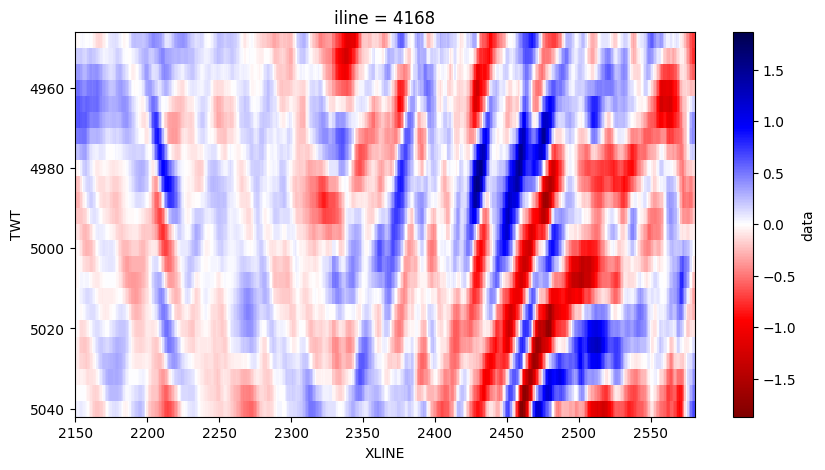

In [15]:
fig, ax1 = plt.subplots(ncols=1, figsize=(10, 5))
iline_sel = 4168
V3D.data.transpose("twt", "iline", "xline", transpose_coords=True).sel(
    iline=iline_sel
).plot(yincrease=False, cmap="seismic_r")
# plt.grid("grey")
plt.ylabel("TWT")
plt.xlabel("XLINE")
# plt.savefig('seismic_depth_4480.png')

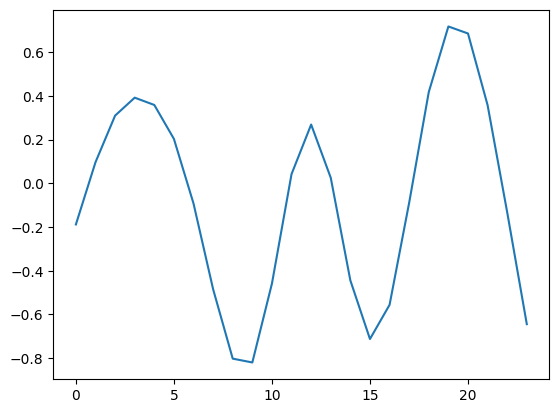

In [17]:
plt.plot(V3D.data.sel(iline=iline_sel,xline=2525).data);

# porosidade

In [125]:
def porosity_calc(rho_b, rho_ma, rho_f):
    rho_n = np.array(rho_b)
    phi_calc = np.zeros(rho_n.size)
    for i in range(rho_n.size):
        phi_calc[i] = ((rho_n[i] - rho_ma) / (rho_f-rho_ma))*100

    return phi_calc

In [126]:
# well1 = lasio.read('7buz12rjs_editadas.las')
# well2 = lasio.read('7-buz-14da-rjs_curvas_basicas.las')
well3 = lasio.read('data/dados/7buz23rjs.las')
# well4 = lasio.read('7-buz-25-rjs_curvas_basicas.las')
well5 = lasio.read('data/dados/7-buz-29-rjs.las')
# well6 = lasio.read('7-buz-31d-rjs_curvas_basicas.las')
# well7 = lasio.read('8-BUZ-21D-RJS_editadas.las')
well8 = lasio.read('data/dados/8-buz-26-rjs.las')
well9 = lasio.read('data/dados/8buz28da.las')
# well10 = lasio.read('8-buz-32da-rjs_curvas_basicas.las')
# well11 = lasio.read('8buz15rjs_edit.las')
well12 = lasio.read('data/dados/8buz20rjs.las')
# well13 = lasio.read('3-BRSA-1184-RJS-las.las')
well14 = lasio.read('data/dados/7-buz-10-rjs.las')
# well15 = lasio.read('7-BUZ-30-RJS-las.las')
# well16 = lasio.read('8-BUZ-9-RJS-las.las')
# well20 = lasio.read('9-BRSA-1191-RJS-las.las') #converter nphi para porcentagem
# well18 = lasio.read('9-BUZ-4-RJS-las.las')
# well19 = lasio.read('9-BUZ-8-RJS-las.las')

##
# well17 = lasio.read('9-BRSA-1197-RJS-las.las') #Utilizar para gerar figura, converter nphi para porcentagem
well18 = lasio.read('data/dados/3-brsa-1053-rjs.las')

In [127]:
well3_df = well3.df().dropna(how = 'any', axis=0)
well5_df = well5.df().dropna(how = 'any', axis=0)
well8_df = well8.df().dropna(how = 'any', axis=0)
well9_df = well9.df().dropna(how = 'any', axis=0)
well12_df = well12.df().dropna(how = 'any', axis=0)
well14_df = well14.df().dropna(how = 'any', axis=0)
well18_df = well18.df().dropna(how = 'any', axis=0)

In [128]:
data3 = well3_df
res3 = np.array(data3['BRRESP'])[+150:]
rho3 = np.array(data3['BRDENS'])[+150:]
dtp3 = np.array(data3['BRDTP'])[+150:]
dts3 = np.array(data3['BRDTS'])[+150:]
phi3 = np.array(data3['BRNEUT'])[+150:]
gr3 = np.array(data3['BRGR'])[+150:]
z3 = data3.index[+150:]

vp3 = (10**3/dtp3)*0.3048 #km/s
vs3 = (10**3/dts3)*0.3048 #km/s

phi_den3 = porosity_calc(rho3,2.8,1.05)

In [129]:
data5 = well5_df
res5 = np.array(data5['BRRESP'])[+150:]
rho5 = np.array(data5['BRDENS'])[+150:]
dtp5 = np.array(data5['BRDTP'])[+150:]
phi5 = np.array(data5['BRNEUT'])[+150:]
gr5 = np.array(data5['BRGR'])[+150:]
z5 = data5.index[+150:]

vp5 = (10**3/dtp5)*0.3048 #km/s

phi_den5 = porosity_calc(rho5,2.8,1.05)

In [130]:
data8 = well8_df
res8 = np.array(data8['BRRESP'])[+14200:]
rho8 = np.array(data8['BRDENS'])[+14200:]
dtp8 = np.array(data8['BRDTP'])[+14200:]
phi8 = np.array(data8['BRNEUT'])[+14200:]
gr8 = np.array(data8['BRGR'])[+14200:]
z8 = data8.index[+14200:]

vp8 = (10**3/dtp8)*0.3048 #km/s

phi_den8 = porosity_calc(rho8,2.8,1.05)

In [131]:
data9 = well9_df
res9 = np.array(data9['BRRESP'])
rho9 = np.array(data9['BRDENS'])
dtp9 = np.array(data9['BRDTP'])
phi9 = np.array(data9['BRNEUT'])
gr9 = np.array(data9['BRGR'])
z9 = data9.index

vp9 = (10**3/dtp9)*0.3048 #km/s

phi_den9 = porosity_calc(rho9,2.8,1.05)

In [132]:
data12 = well12_df
res12 = np.array(data12['BRRESP'])
rho12 = np.array(data12['BRDENS'])
dtp12 = np.array(data12['BRDTP'])
phi12 = np.array(data12['BRNEUT'])
gr12 = np.array(data12['BRGR'])
z12 = data12.index

vp12 = (10**3/dtp12)*0.3048 #km/s

phi_den12 = porosity_calc(rho12,2.8,1.05)

In [133]:
data14 = well14_df
# res14 = np.array(data14['RT90'])[+500:-500]
# rho14 = np.array(data14['RHOB'])[+500:-500]
# dtp14 = np.array(data14['DT'])[+500:-500]
# phi14 = np.array(data14['NPHI'])[+500:-500]
# gr14 = np.array(data14['GR'])[+500:-500]
# z14 = data14.index[+500:-500]
res14 = np.array(data14['RT90'])
rho14 = np.array(data14['RHOB'])
dtp14 = np.array(data14['DT'])
phi14 = np.array(data14['NPHI'])
gr14 = np.array(data14['GR'])
z14 = data14.index

vp14 = (10**3/dtp14)*0.3048 #km/s

phi_den14 = porosity_calc(rho14,2.8,1.05)

In [134]:
data18 = well18_df
res18 = np.array(data18['BRRESP'])
rho18 = np.array(data18['BRDENS'])
dtp18 = np.array(data18['BRDTP'])
phi18 = np.array(data18['BRNEUT'])*1e2
gr18 = np.array(data18['BRGR'])
z18 = data18.index

vp18 = (10**3/dtp18)*0.3048 #km/s

phi_den18 = porosity_calc(rho18,2.8,1.05)

# regressao

In [135]:
array3 = np.array([phi3]).T
array5 = np.array([phi5]).T
array8 = np.array([phi8]).T
array9 = np.array([phi9]).T
array12 = np.array([phi12]).T
array14 = np.array([phi14]).T
array18 = np.array([phi18]).T

y3 = vp3 * rho3
y5 = vp5 * rho5
y8 = vp8 * rho8
y9 = vp9 * rho9
y12 = vp12 * rho12
y14 = vp14 * rho14
y18 = vp18 * rho18

x_data = np.concatenate([array3, array5, array8, array9, array12, array14, array18])
y_data = np.concatenate([y3, y5, y8, y9, y12, y14, y18])

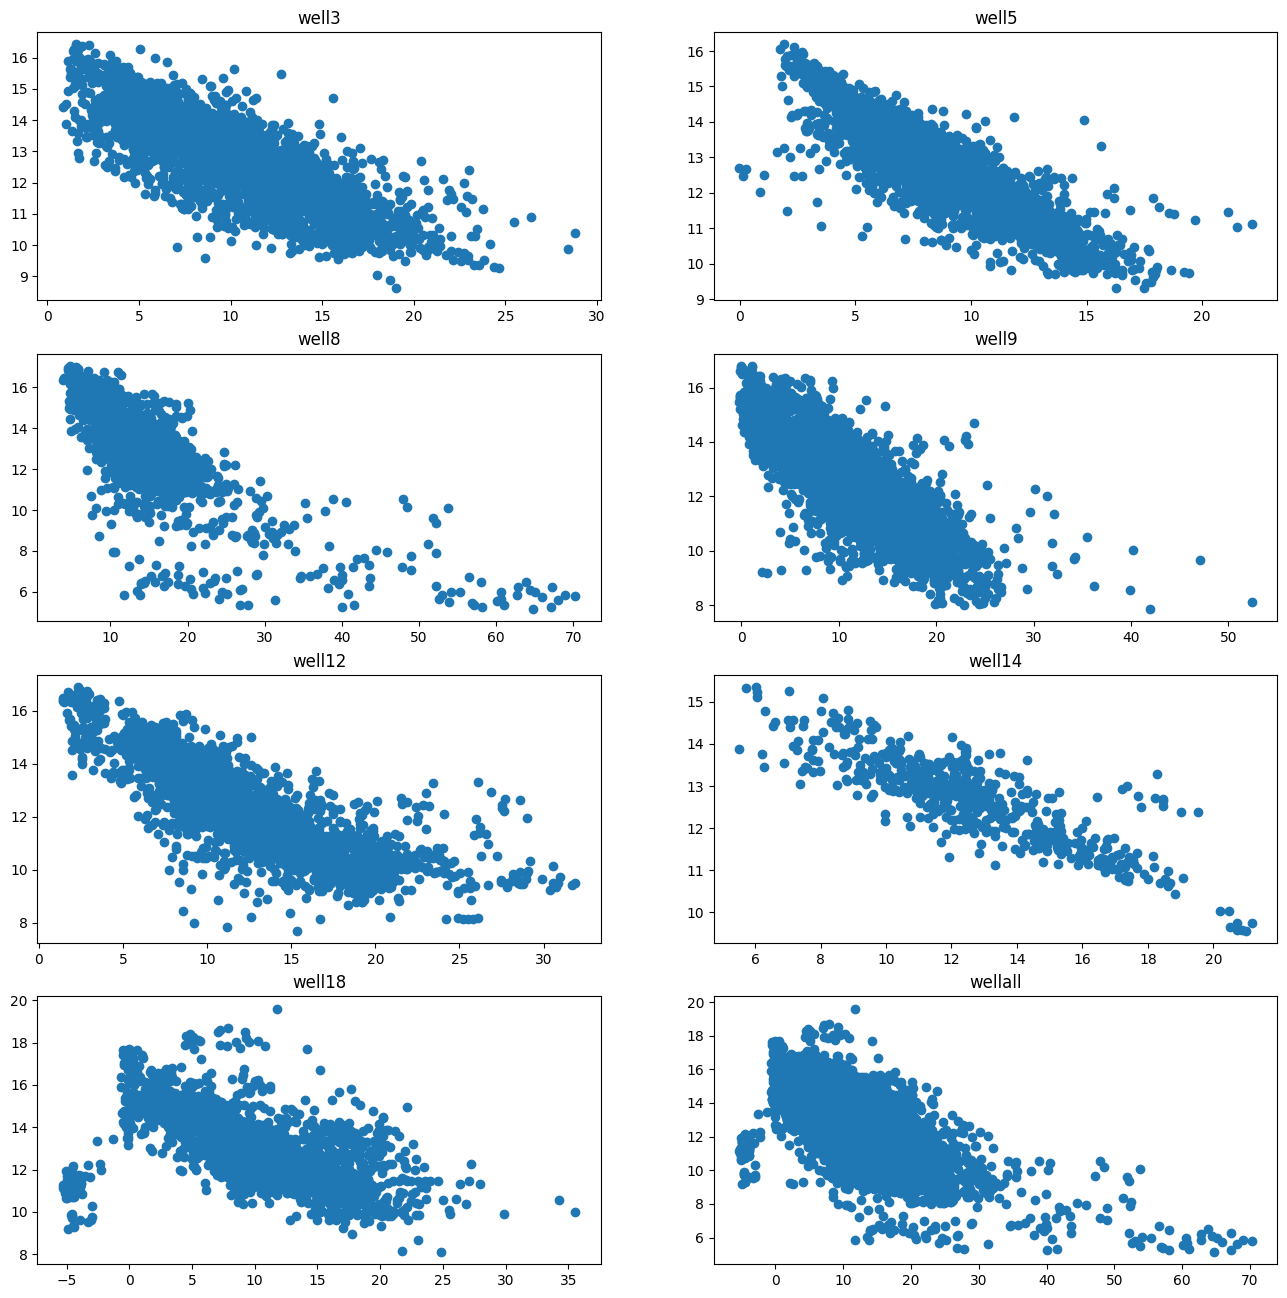

In [136]:
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (16, 16))

axes[0, 0].scatter(array3, y3);
axes[0, 1].scatter(array5, y5);
axes[1, 0].scatter(array8, y8);
axes[1, 1].scatter(array9, y9);
axes[2, 0].scatter(array12, y12);
axes[2, 1].scatter(array14, y14);
axes[3, 0].scatter(array18, y18);
axes[3, 1].scatter(x_data, y_data);

col1 = [3, 8, 12, 18]
col2 = [5, 9, 14, 'all']
[ax[0].set_title('well{}'.format(col1[idx])) for idx, ax in enumerate(axes)];
[ax[1].set_title('well{}'.format(col2[idx])) for idx, ax in enumerate(axes)];

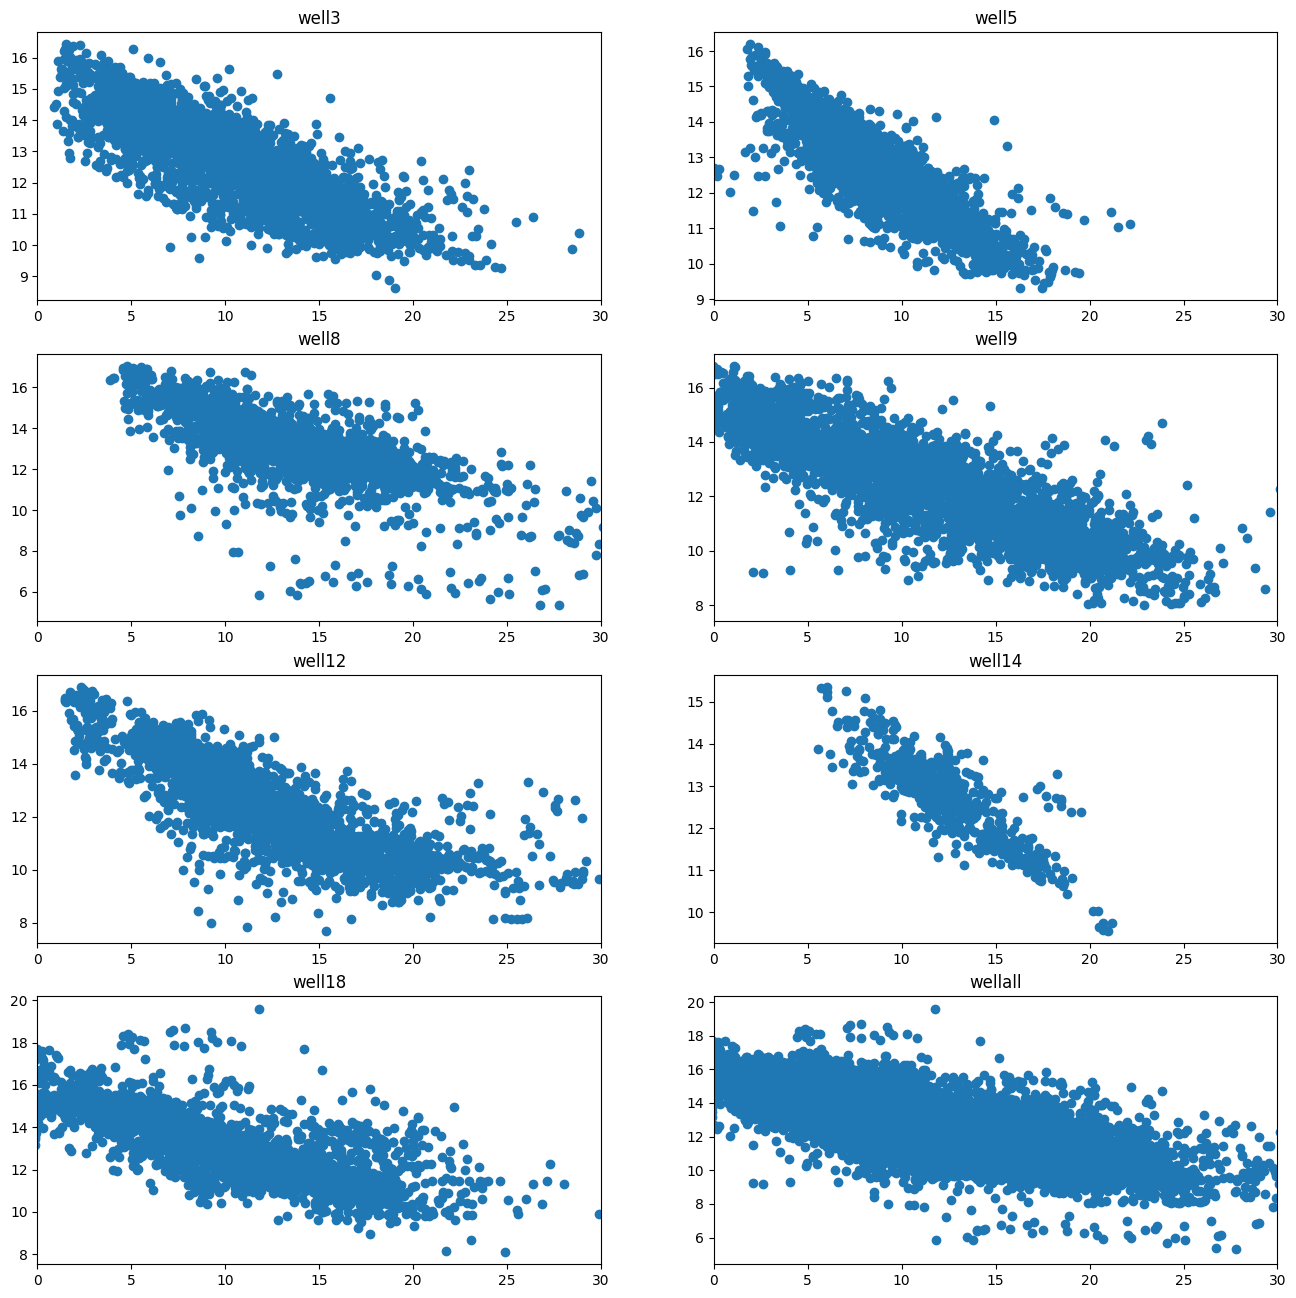

In [137]:
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (16, 16))

axes[0, 0].scatter(array3, y3);
axes[0, 1].scatter(array5, y5);
axes[1, 0].scatter(array8, y8);
axes[1, 1].scatter(array9, y9);
axes[2, 0].scatter(array12, y12);
axes[2, 1].scatter(array14, y14);
axes[3, 0].scatter(array18, y18);
axes[3, 1].scatter(x_data, y_data);

col1 = [3, 8, 12, 18]
col2 = [5, 9, 14, 'all']
[ax[0].set_title('well{}'.format(col1[idx])) for idx, ax in enumerate(axes)];
[ax[1].set_title('well{}'.format(col2[idx])) for idx, ax in enumerate(axes)];
[(ax[0].set_xlim([0, 30]), ax[1].set_xlim([0, 30])) for ax in axes];

In [138]:
regr_lr3 = LinearRegression().fit(array3, y3)
regr_lr5 = LinearRegression().fit(array5, y5)
regr_lr8 = LinearRegression().fit(array8, y8)
regr_lr9 = LinearRegression().fit(array9, y9)
regr_lr12 = LinearRegression().fit(array12, y12)
regr_lr14 = LinearRegression().fit(array14, y14)
regr_lr18 = LinearRegression().fit(array18, y18)

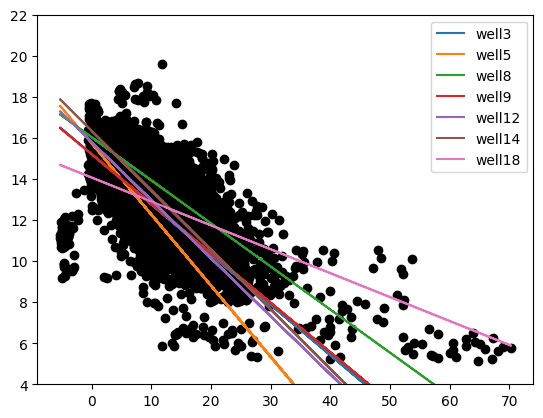

In [139]:
plt.scatter(x_data, y_data, color = 'black');

plt.plot(x_data, regr_lr3.predict(x_data), label = 'well3');
plt.plot(x_data, regr_lr5.predict(x_data), label = 'well5');
plt.plot(x_data, regr_lr8.predict(x_data), label = 'well8');
plt.plot(x_data, regr_lr9.predict(x_data), label = 'well9');
plt.plot(x_data, regr_lr12.predict(x_data), label = 'well12');
plt.plot(x_data, regr_lr14.predict(x_data), label = 'well14');
plt.plot(x_data, regr_lr18.predict(x_data), label = 'well18');

plt.legend();
plt.ylim([4, 22]);

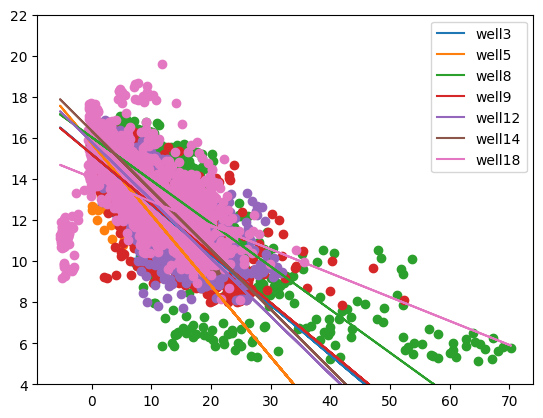

In [140]:
plt.scatter(array3, y3);
plt.scatter(array5, y5);
plt.scatter(array8, y8);
plt.scatter(array9, y9);
plt.scatter(array12, y12);
plt.scatter(array14, y14);
plt.scatter(array18, y18);

plt.plot(x_data, regr_lr3.predict(x_data), label = 'well3');
plt.plot(x_data, regr_lr5.predict(x_data), label = 'well5');
plt.plot(x_data, regr_lr8.predict(x_data), label = 'well8');
plt.plot(x_data, regr_lr9.predict(x_data), label = 'well9');
plt.plot(x_data, regr_lr12.predict(x_data), label = 'well12');
plt.plot(x_data, regr_lr14.predict(x_data), label = 'well14');
plt.plot(x_data, regr_lr18.predict(x_data), label = 'well18');

plt.legend();
plt.ylim([4, 22]);

## well3

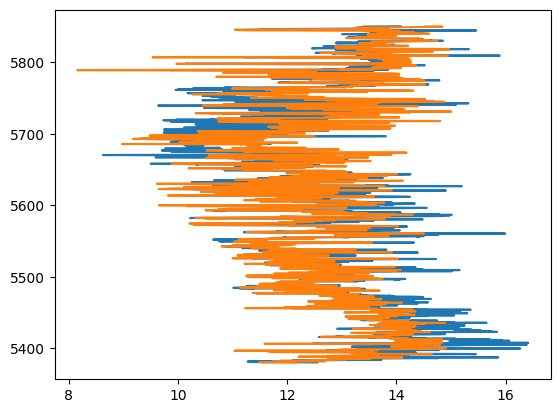

In [165]:
plt.plot(y3, z3);
plt.plot(regr_lr3.predict(array3), z3);

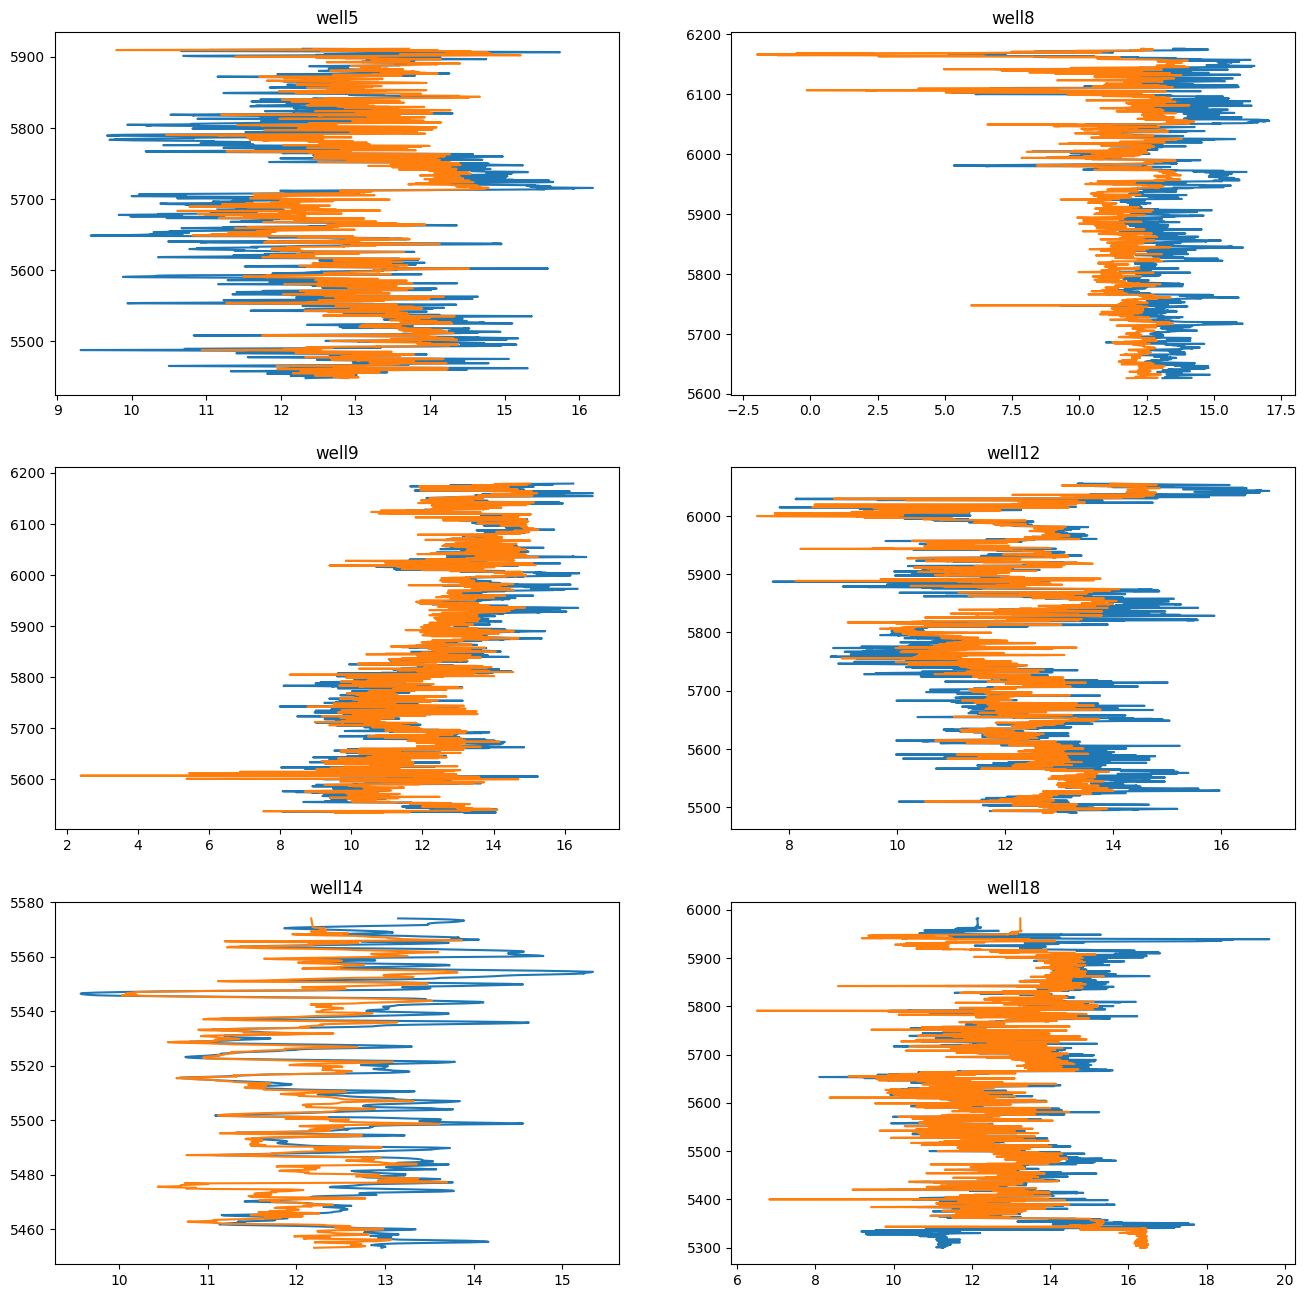

In [164]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (16, 16))

axes[0, 0].plot(y5, z5);
axes[0, 0].plot(regr_lr3.predict(array5), z5);
axes[0, 1].plot(y8, z8);
axes[0, 1].plot(regr_lr3.predict(array8), z8);
axes[1, 0].plot(y9, z9);
axes[1, 0].plot(regr_lr3.predict(array9), z9);
axes[1, 1].plot(y12, z12);
axes[1, 1].plot(regr_lr3.predict(array12), z12);
axes[2, 0].plot(y14, z14);
axes[2, 0].plot(regr_lr3.predict(array14), z14);
axes[2, 1].plot(y18, z18);
axes[2, 1].plot(regr_lr3.predict(array18), z18);

col1 = [5, 9, 14]
col2 = [8, 12, 18]
[ax[0].set_title('well{}'.format(col1[idx])) for idx, ax in enumerate(axes)];
[ax[1].set_title('well{}'.format(col2[idx])) for idx, ax in enumerate(axes)];

## well5

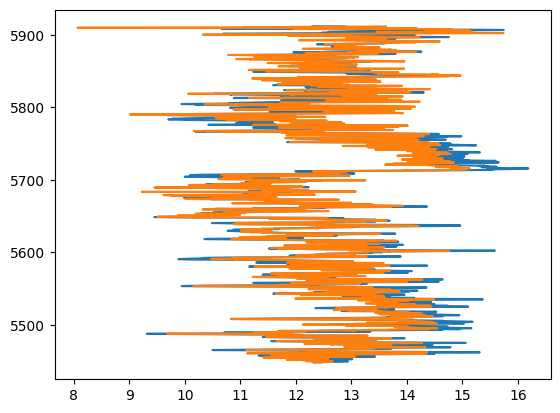

In [161]:
plt.plot(y5, z5);
plt.plot(regr_lr5.predict(array5), z5);

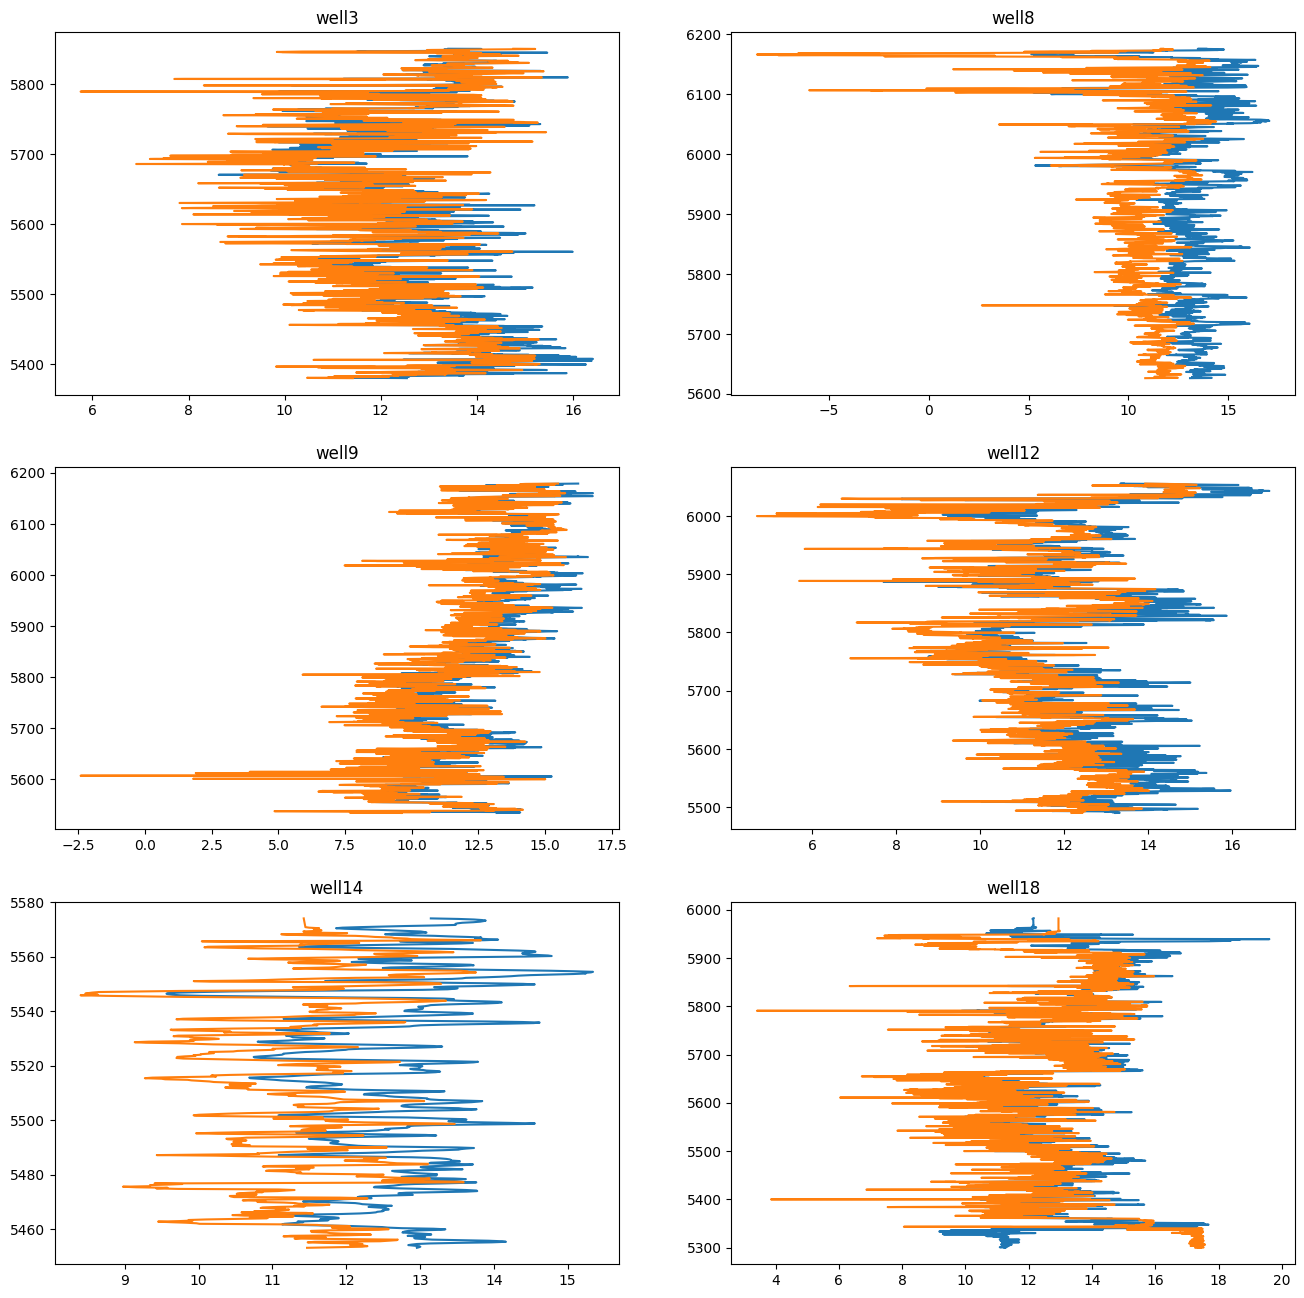

In [170]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (16, 16))

axes[0, 0].plot(y3, z3);
axes[0, 0].plot(regr_lr5.predict(array3), z3);
axes[0, 1].plot(y8, z8);
axes[0, 1].plot(regr_lr5.predict(array8), z8);
axes[1, 0].plot(y9, z9);
axes[1, 0].plot(regr_lr5.predict(array9), z9);
axes[1, 1].plot(y12, z12);
axes[1, 1].plot(regr_lr5.predict(array12), z12);
axes[2, 0].plot(y14, z14);
axes[2, 0].plot(regr_lr5.predict(array14), z14);
axes[2, 1].plot(y18, z18);
axes[2, 1].plot(regr_lr5.predict(array18), z18);

col1 = [3, 9, 14]
col2 = [8, 12, 18]
[ax[0].set_title('well{}'.format(col1[idx])) for idx, ax in enumerate(axes)];
[ax[1].set_title('well{}'.format(col2[idx])) for idx, ax in enumerate(axes)];

## well8

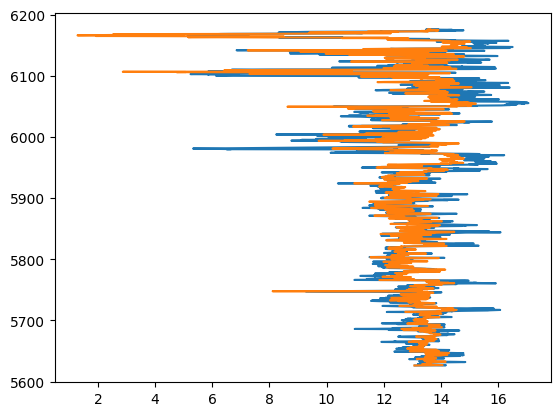

In [169]:
plt.plot(y8, z8);
plt.plot(regr_lr8.predict(array8), z8);

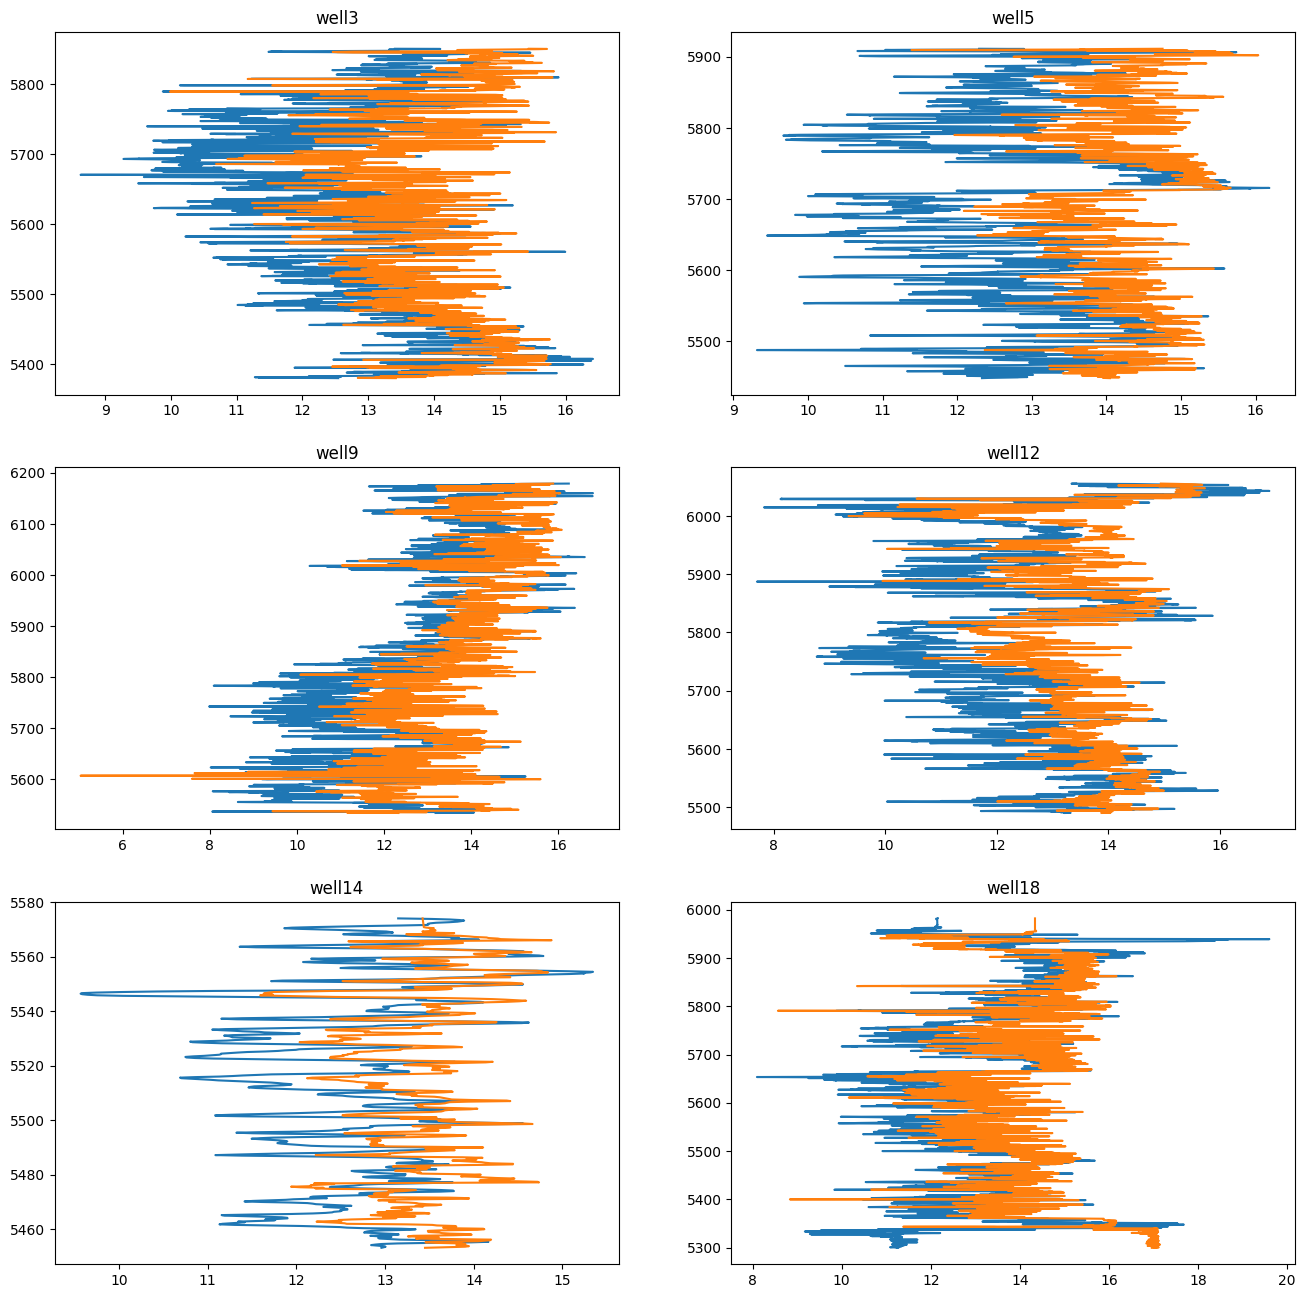

In [171]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (16, 16))

axes[0, 0].plot(y3, z3);
axes[0, 0].plot(regr_lr8.predict(array3), z3);
axes[0, 1].plot(y5, z5);
axes[0, 1].plot(regr_lr8.predict(array5), z5);
axes[1, 0].plot(y9, z9);
axes[1, 0].plot(regr_lr8.predict(array9), z9);
axes[1, 1].plot(y12, z12);
axes[1, 1].plot(regr_lr8.predict(array12), z12);
axes[2, 0].plot(y14, z14);
axes[2, 0].plot(regr_lr8.predict(array14), z14);
axes[2, 1].plot(y18, z18);
axes[2, 1].plot(regr_lr8.predict(array18), z18);

col1 = [3, 9, 14]
col2 = [5, 12, 18]
[ax[0].set_title('well{}'.format(col1[idx])) for idx, ax in enumerate(axes)];
[ax[1].set_title('well{}'.format(col2[idx])) for idx, ax in enumerate(axes)];

## well9

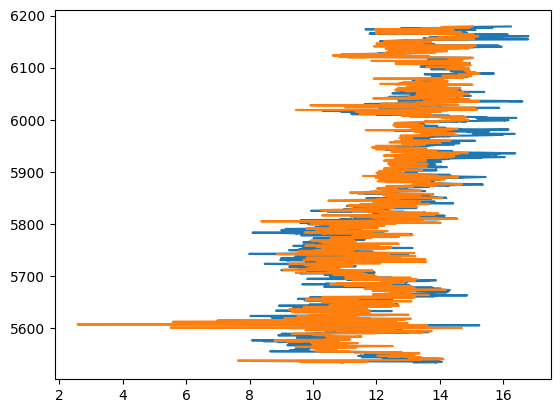

In [172]:
plt.plot(y9, z9);
plt.plot(regr_lr9.predict(array9), z9);

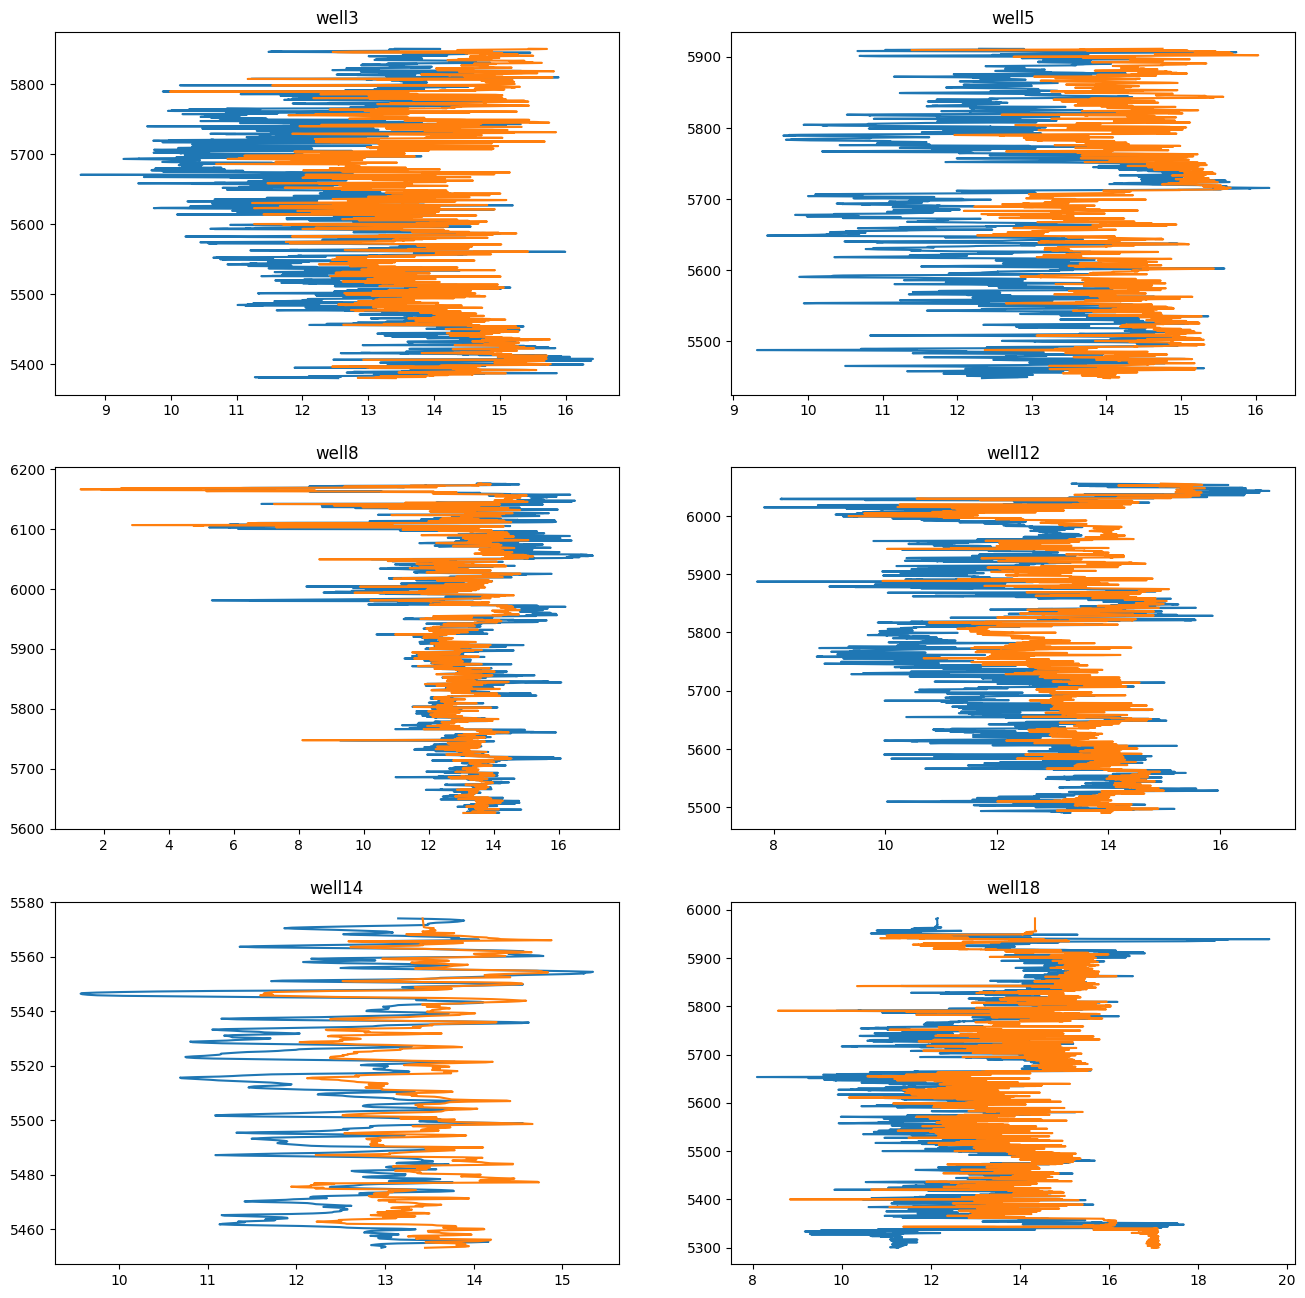

In [173]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (16, 16))

axes[0, 0].plot(y3, z3);
axes[0, 0].plot(regr_lr9.predict(array3), z3);
axes[0, 1].plot(y5, z5);
axes[0, 1].plot(regr_lr9.predict(array5), z5);
axes[1, 0].plot(y8, z8);
axes[1, 0].plot(regr_lr9.predict(array8), z8);
axes[1, 1].plot(y12, z12);
axes[1, 1].plot(regr_lr9.predict(array12), z12);
axes[2, 0].plot(y14, z14);
axes[2, 0].plot(regr_lr9.predict(array14), z14);
axes[2, 1].plot(y18, z18);
axes[2, 1].plot(regr_lr9.predict(array18), z18);

col1 = [3, 8, 14]
col2 = [5, 12, 18]
[ax[0].set_title('well{}'.format(col1[idx])) for idx, ax in enumerate(axes)];
[ax[1].set_title('well{}'.format(col2[idx])) for idx, ax in enumerate(axes)];

## well12

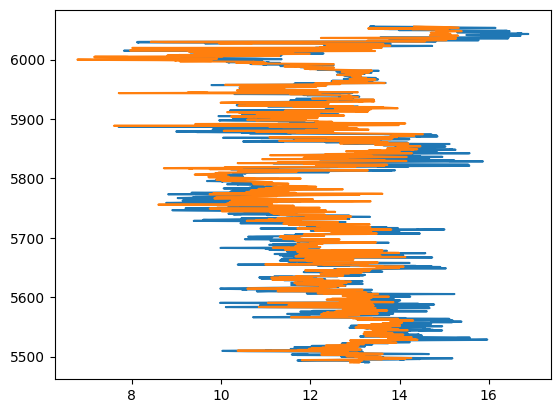

In [154]:
plt.plot(y12, z12);
plt.plot(regr_lr12.predict(array12), z12);

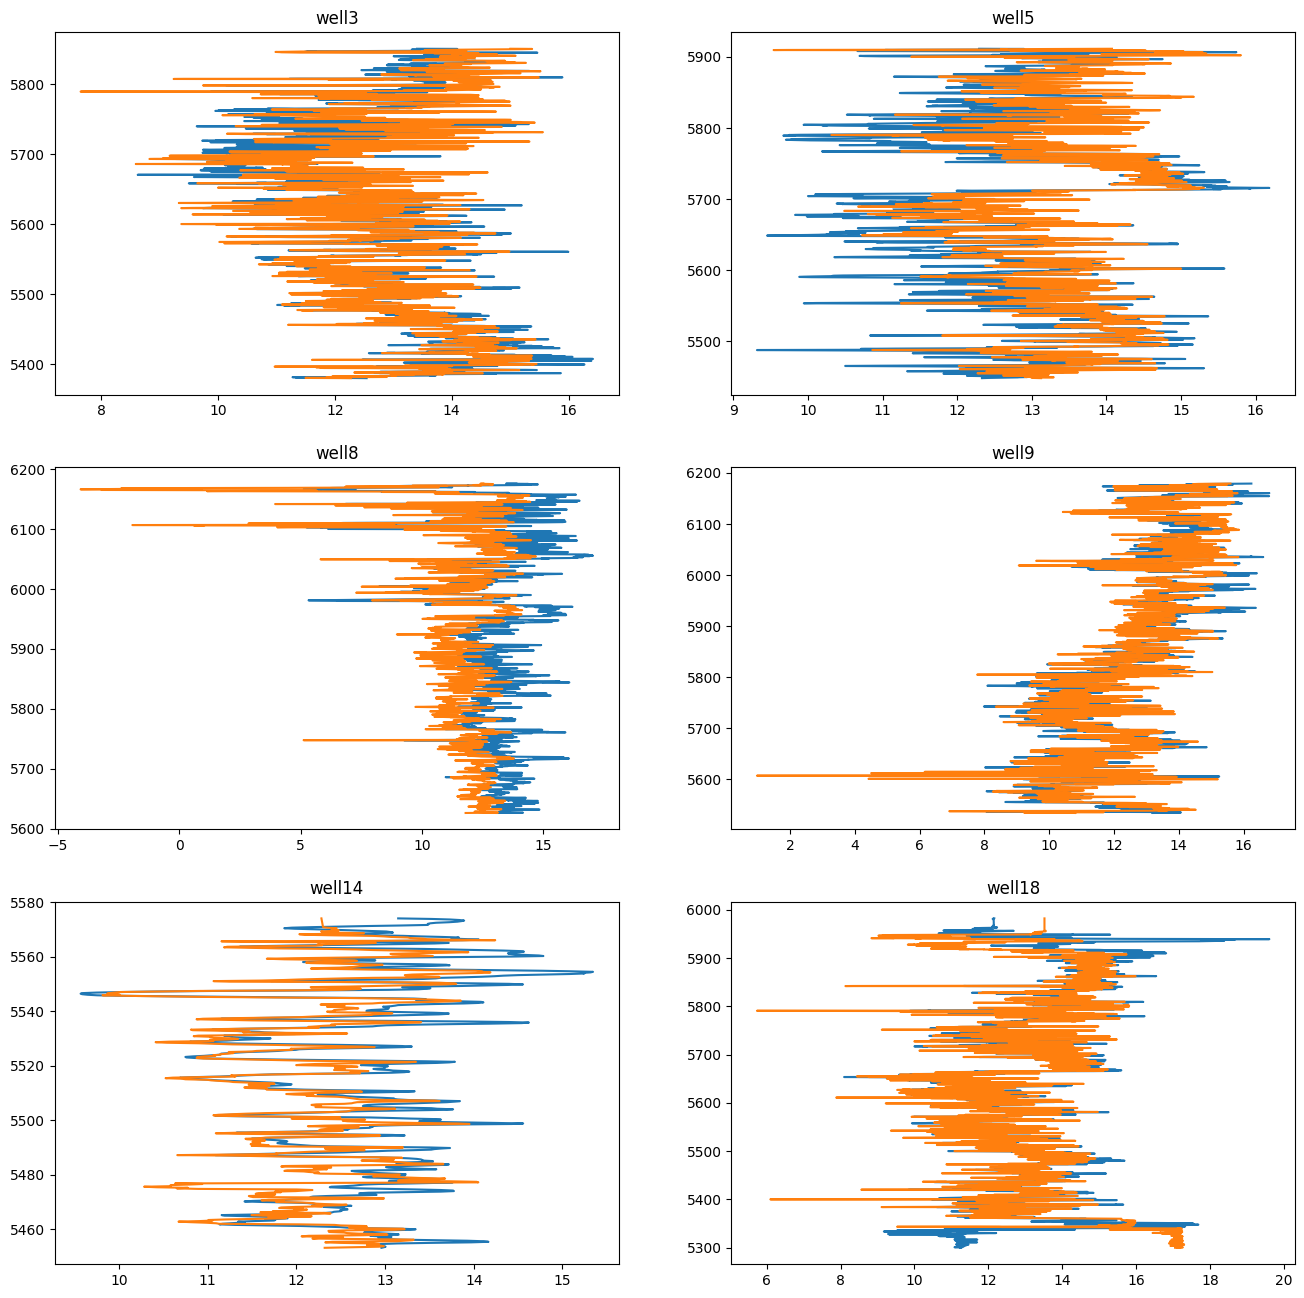

In [174]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (16, 16))

axes[0, 0].plot(y3, z3);
axes[0, 0].plot(regr_lr12.predict(array3), z3);
axes[0, 1].plot(y5, z5);
axes[0, 1].plot(regr_lr12.predict(array5), z5);
axes[1, 0].plot(y8, z8);
axes[1, 0].plot(regr_lr12.predict(array8), z8);
axes[1, 1].plot(y9, z9);
axes[1, 1].plot(regr_lr12.predict(array9), z9);
axes[2, 0].plot(y14, z14);
axes[2, 0].plot(regr_lr12.predict(array14), z14);
axes[2, 1].plot(y18, z18);
axes[2, 1].plot(regr_lr12.predict(array18), z18);

col1 = [3, 8, 14]
col2 = [5, 9, 18]
[ax[0].set_title('well{}'.format(col1[idx])) for idx, ax in enumerate(axes)];
[ax[1].set_title('well{}'.format(col2[idx])) for idx, ax in enumerate(axes)];

## well14

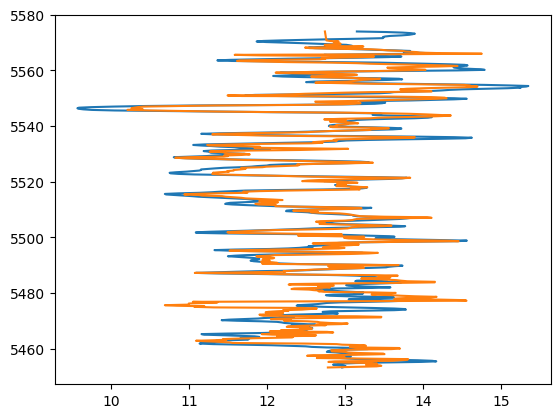

In [155]:
plt.plot(y14, z14);
plt.plot(regr_lr14.predict(array14), z14);

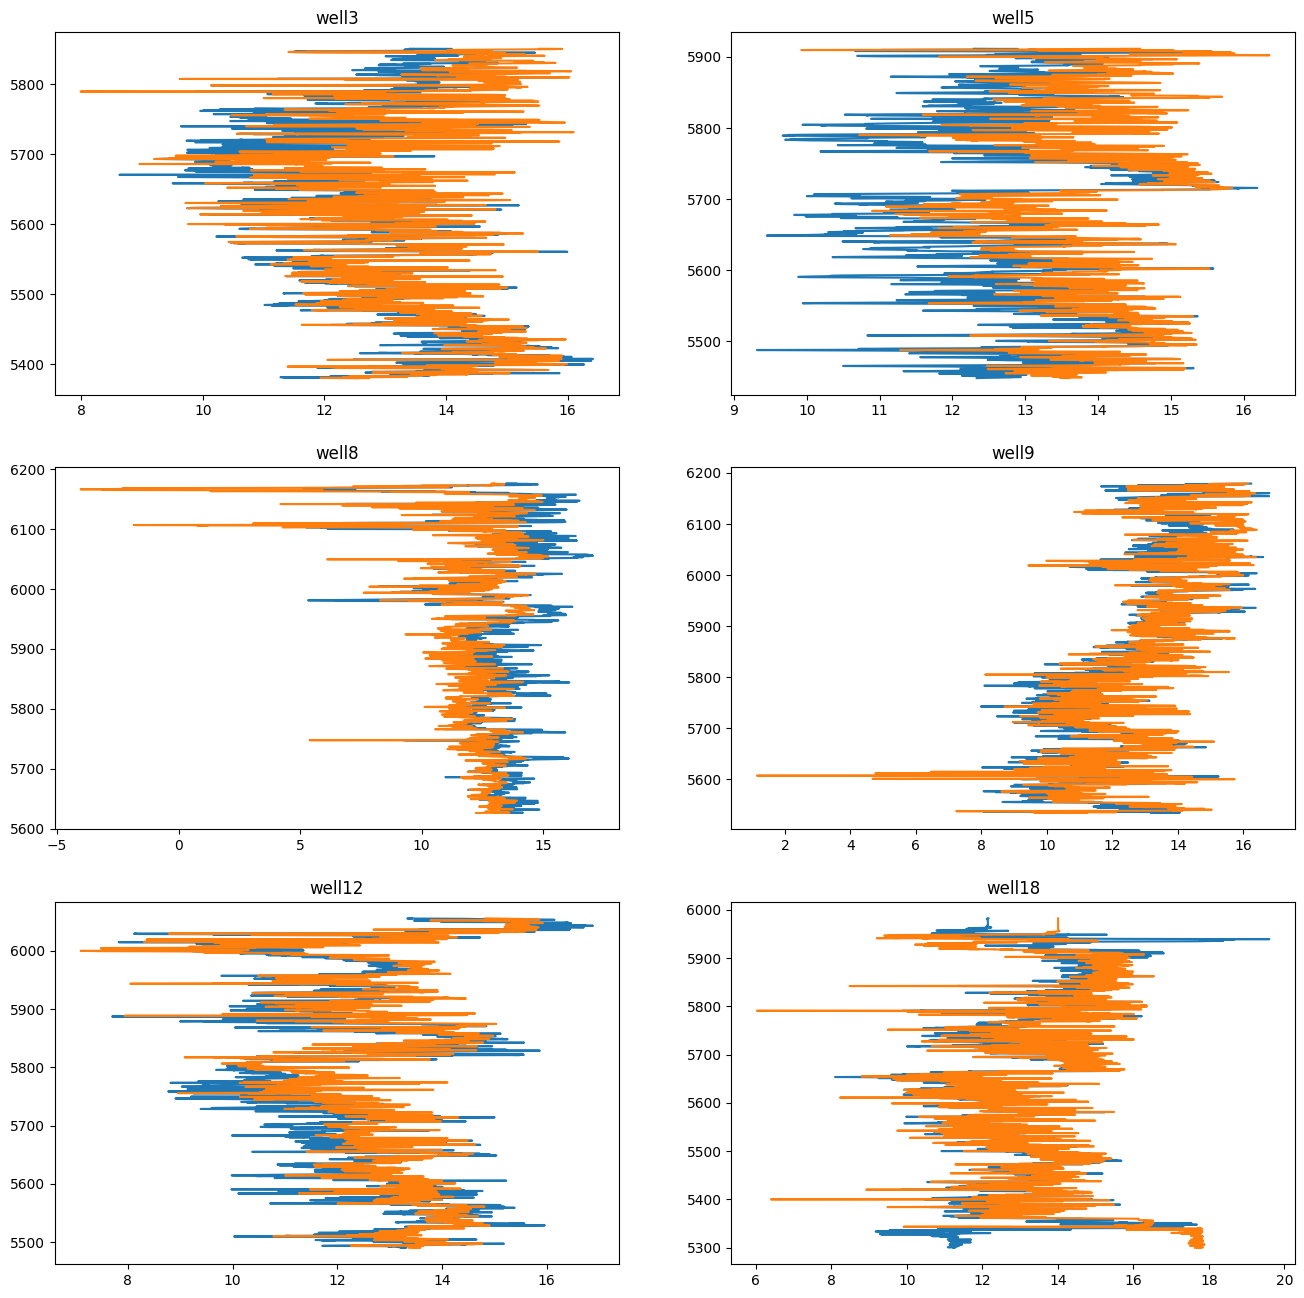

In [175]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (16, 16))

axes[0, 0].plot(y3, z3);
axes[0, 0].plot(regr_lr14.predict(array3), z3);
axes[0, 1].plot(y5, z5);
axes[0, 1].plot(regr_lr14.predict(array5), z5);
axes[1, 0].plot(y8, z8);
axes[1, 0].plot(regr_lr14.predict(array8), z8);
axes[1, 1].plot(y9, z9);
axes[1, 1].plot(regr_lr14.predict(array9), z9);
axes[2, 0].plot(y12, z12);
axes[2, 0].plot(regr_lr14.predict(array12), z12);
axes[2, 1].plot(y18, z18);
axes[2, 1].plot(regr_lr14.predict(array18), z18);

col1 = [3, 8, 12]
col2 = [5, 9, 18]
[ax[0].set_title('well{}'.format(col1[idx])) for idx, ax in enumerate(axes)];
[ax[1].set_title('well{}'.format(col2[idx])) for idx, ax in enumerate(axes)];

## well18

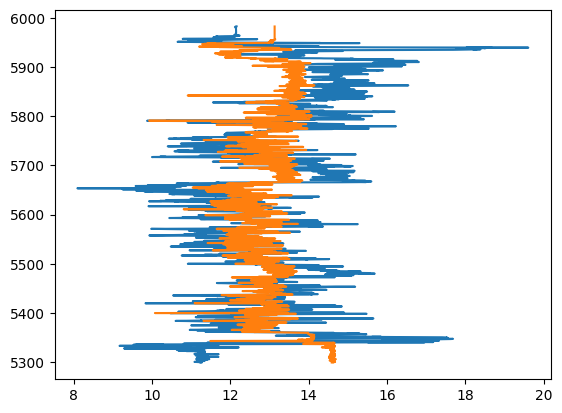

In [156]:
plt.plot(y18, z18);
plt.plot(regr_lr18.predict(array18), z18);

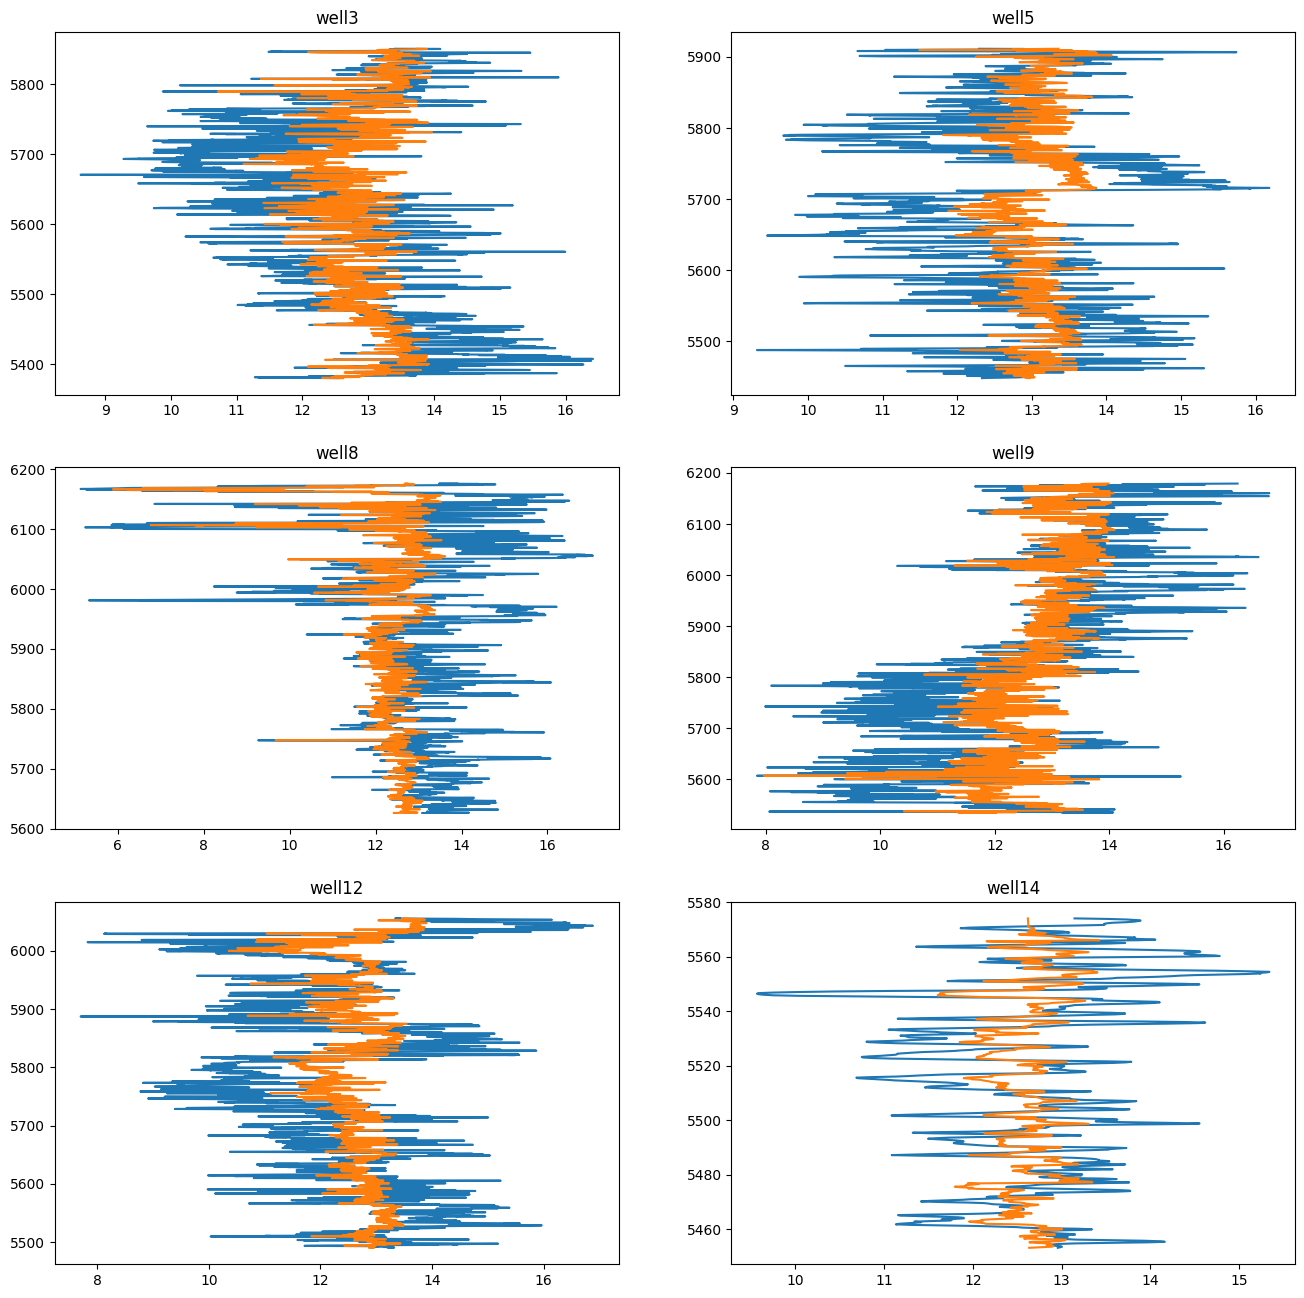

In [176]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (16, 16))

axes[0, 0].plot(y3, z3);
axes[0, 0].plot(regr_lr18.predict(array3), z3);
axes[0, 1].plot(y5, z5);
axes[0, 1].plot(regr_lr18.predict(array5), z5);
axes[1, 0].plot(y8, z8);
axes[1, 0].plot(regr_lr18.predict(array8), z8);
axes[1, 1].plot(y9, z9);
axes[1, 1].plot(regr_lr18.predict(array9), z9);
axes[2, 0].plot(y12, z12);
axes[2, 0].plot(regr_lr18.predict(array12), z12);
axes[2, 1].plot(y14, z14);
axes[2, 1].plot(regr_lr18.predict(array14), z14);

col1 = [3, 8, 12]
col2 = [5, 9, 14]
[ax[0].set_title('well{}'.format(col1[idx])) for idx, ax in enumerate(axes)];
[ax[1].set_title('well{}'.format(col2[idx])) for idx, ax in enumerate(axes)];

# inversao

In [181]:
twt12 = np.array(data12['TWT'])

idx = (twt12 > 4948) * (twt12 < 5040)
imp12 = vp12 * rho12
imp12_hat = regr_lr12.predict(phi12.reshape(-1, 1))

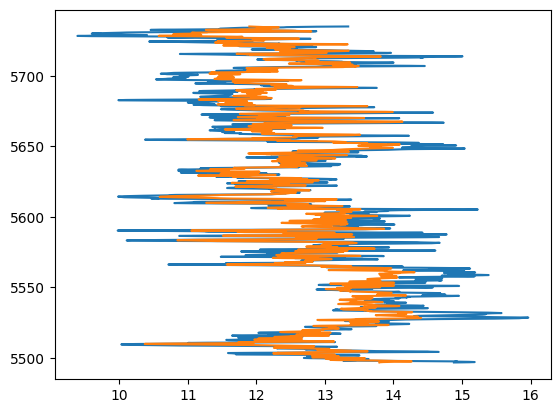

In [185]:
plt.plot(imp12[idx], z12[idx]);
plt.plot(imp12_hat[idx], z12[idx]);

In [186]:
def ricker_wav(f, n, dt, t0):
    T = dt * (np.floor(n / 2))
    t = np.linspace(-T, T, n)
    tau = t - t0
    pi = np.pi
    s = (1-2*tau*tau*f**2*pi**2) * np.exp(-tau**2*pi**2*f**2)
    rw = s
    return rw, t

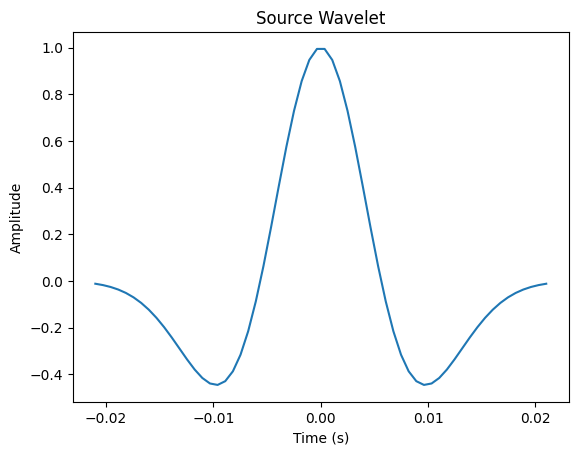

In [187]:
freq = 40
src_len = 60
dt = 7e-4
wvlt, tt = ricker_wav(freq, src_len, dt, 0)

plt.plot(tt, wvlt);
plt.xlabel("Time (s)");
plt.ylabel("Amplitude");
plt.title("Source Wavelet");

In [188]:
def RC_fwd_model_ia(ia1, ia2):
    Rpp = (ia2 - ia1) / (ia2 + ia1)
    return Rpp

In [233]:
imp_idx = np.expand_dims(imp12[idx], axis = 0)
Rpp_0 = RC_fwd_model_ia(imp_idx[:, :-1], imp_idx[:, 1:])
Rpplast = 0.0 / (imp_idx[:, 0])
Rpp0 = np.concatenate([Rpp_0, np.expand_dims(Rpplast, axis = 1)], axis = 1)

imp_idx.shape, Rpp_0.shape, Rpplast.shape, Rpp0.shape

((1, 1565), (1, 1564), (1,), (1, 1565))

In [243]:
Rpp = Rpp0[0, :]
trace = np.convolve(Rpp, wvlt, mode = 'same')

Rpp.shape, trace.shape

((1565,), (1565,))

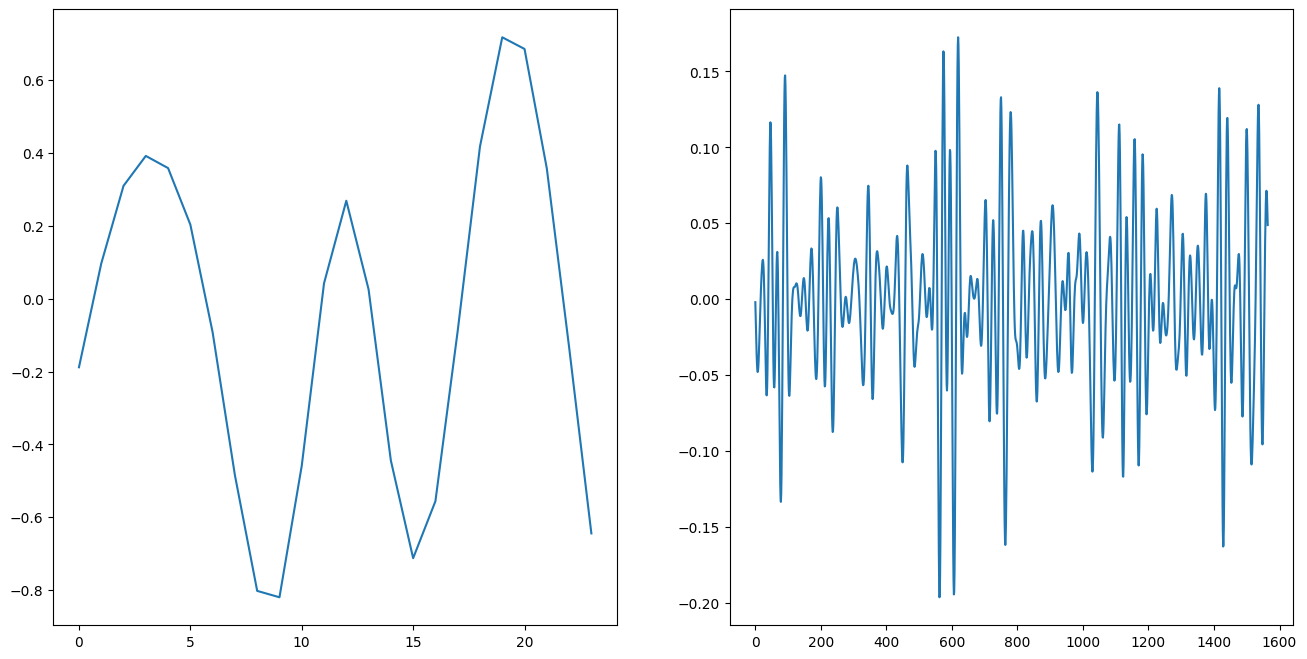

In [241]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 8))

axes[0].plot(V3D.data.sel(iline = 4168, xline = 2525).data);
axes[1].plot(trace);

In [ ]:
kernel_wvlt = tf.reshape(wvlt, [int(wvlt.shape[0]), 1, 1])
RC0 = tf.expand_dims(Rpp0, axis=2)
seis_for0 = tf.squeeze(tf.nn.conv1d(RC0, tf.reverse(kernel_wvlt,[0]), 1,'SAME'),axis=2)

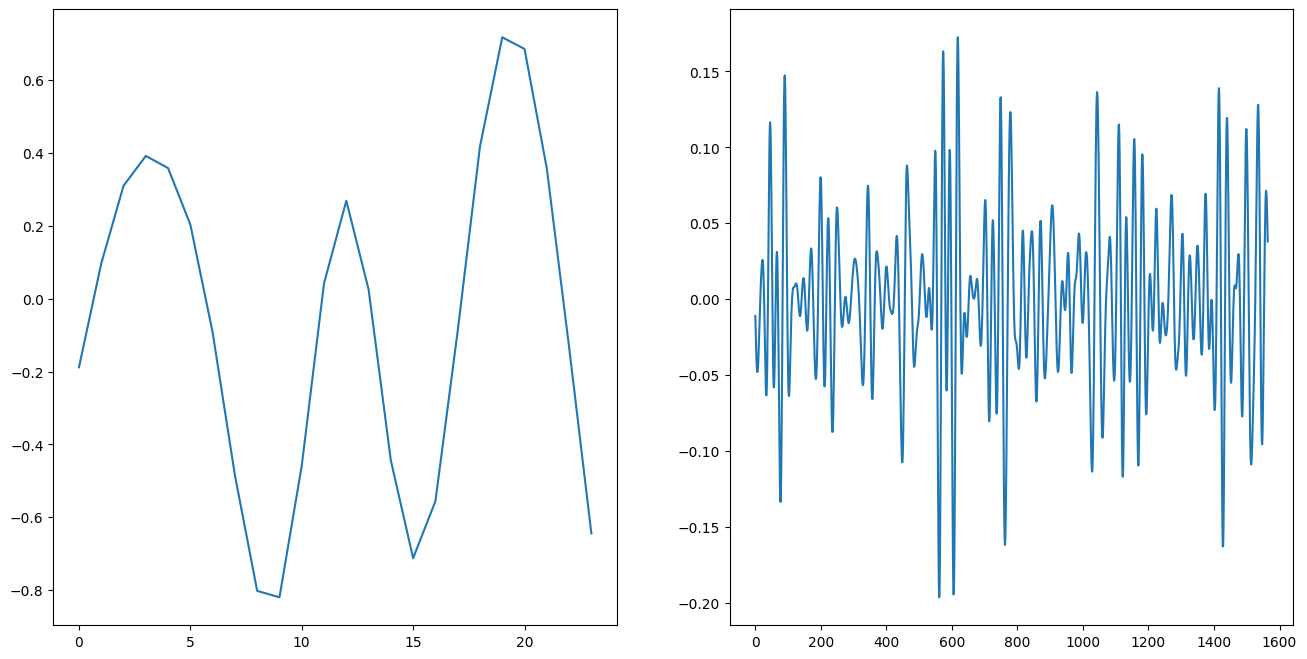

In [248]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 8))

axes[0].plot(V3D.data.sel(iline = 4168, xline = 2525).data);
axes[1].plot(seis_for0[0, :]);

# wavelet

In [249]:
def ricker_wavelet(length, dt, f0):
    """
    Generate a Ricker wavelet.

    Parameters:
    length (int): Number of samples in the wavelet.
    dt (float): Sample interval in seconds.
    f0 (float): Dominant frequency of the wavelet in Hz.

    Returns:
    numpy array: Ricker wavelet.
    """
    t = np.arange(-length // 2, length // 2) * dt
    a = np.pi**0.5 * f0 * np.sqrt(2)
    wavelet = (1 - 2 * (np.pi**2) * (f0**2) * (t**2)) * np.exp(- (np.pi**2) * (f0**2) * (t**2))
    return wavelet

In [250]:
def compute_synthetic_trace(reflectivity, dt, wavelet_length=100, f0=25.0):
    """
    Compute a synthetic seismic trace from reflectivity coefficients.

    Parameters:
    reflectivity (numpy array): Reflectivity coefficients.
    dt (float): Sample interval in seconds.
    wavelet_length (int): Number of samples in the Ricker wavelet.
    f0 (float): Dominant frequency of the Ricker wavelet in Hz.

    Returns:
    numpy array: Synthetic seismic trace.
    """
    # Generate the Ricker wavelet
    wavelet = ricker_wavelet(wavelet_length, dt, f0)
    
    # Compute the synthetic trace by convolving reflectivity with the wavelet
    trace = np.convolve(reflectivity, wavelet, mode='same')
    
    return trace

0.05878740409207181

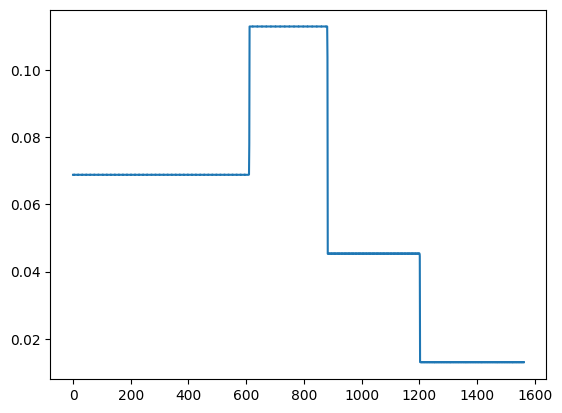

In [262]:
dt = np.diff(twt12[idx])
mu = np.mean(dt)

plt.plot(dt);
mu

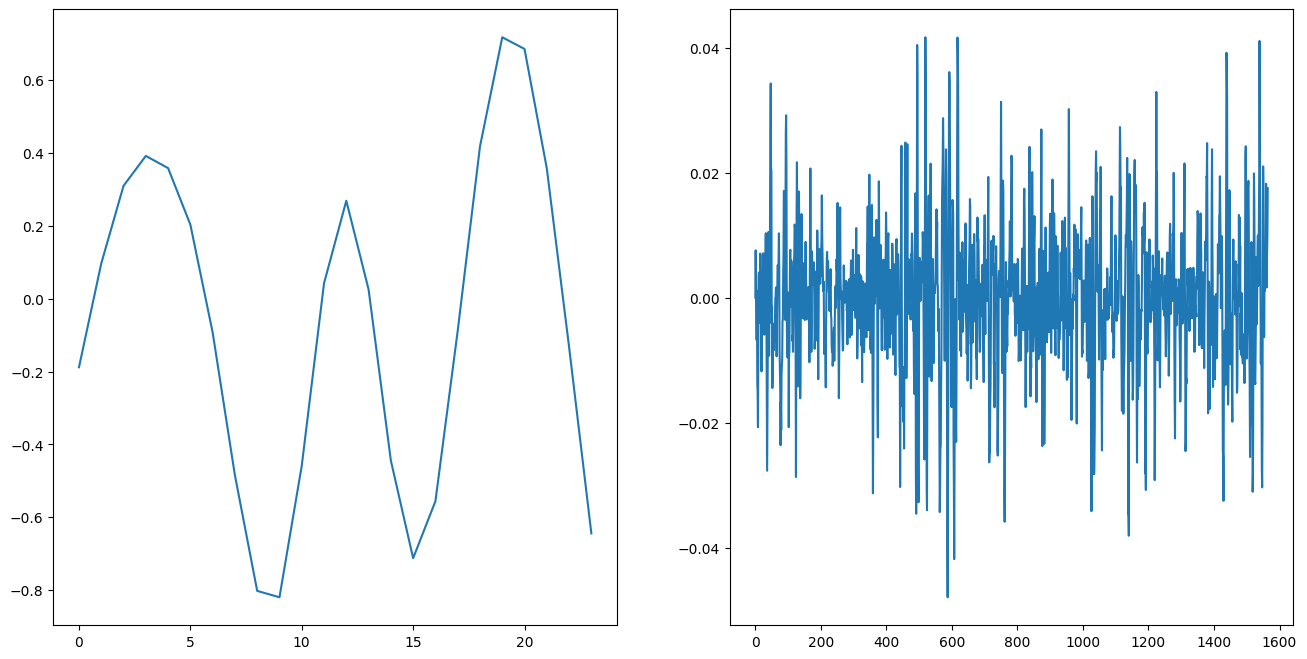

In [263]:
seis = compute_synthetic_trace(reflectivity = Rpp, dt = mu)

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 8))

axes[0].plot(V3D.data.sel(iline = 4168, xline = 2525).data);
axes[1].plot(seis);